In [193]:
import numpy as np
from sympy import symbols, integrate, sqrt
from scipy.optimize import root
import matplotlib.pyplot as plt
import pandas as pd


从里往外的螺线轨迹长度

In [194]:

b = 55/(2*np.pi)
theta = symbols('theta')

# 定义被积函数
f = sqrt(b**2 * theta**2 + b**2)

# 计算积分
Total_Length = integrate(f, (theta, 0, 32*np.pi))

def r_length(theta):
    return 880-b * theta

def positionX(theta):
    return (b*(32*np.pi-theta)*np.cos(32*np.pi-theta))/100

def positionY(theta):
    return (b*(32*np.pi-theta)*np.sin(32*np.pi-theta))/100



总的16圈螺线长度

In [195]:
L1 = 341-27.5*2
L2 = 220-27.5*2
V0 = 100

def equation(x, V0, t):
    return 0.5 * x * np.sqrt(1 + x**2) + 0.5 * np.log(np.abs(x + np.sqrt(1 + x**2))) - (float(Total_Length) - V0 * t) / b


# 龙头对应时间的角度
solutions = []

# 对每个t值求解方程
# for t_value in range(301):
for t_value in range(444):
    result_head_theta = root(equation, 1, args=(V0, t_value)) 
    if result_head_theta.success:
        solutions.append(result_head_theta.x[0])
    else:
        solutions.append(None)  # 如果没有找到解，则存储None
    


theta_rad = 32 * np.pi - np.array(solutions)
mei_miao_long_tou_de_theta=theta_rad.tolist()  #龙头对应时间的角度
# print(mei_miao_long_tou_de_theta)
# x=positionX(theta_rad)
# y=positionY(theta_rad)
# plt.plot(x,y)

求解0-300秒，每秒的头的theta位置

C:\Users\GCX\AppData\Local\Temp\ipykernel_2472\3158670139.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r_length(theta_temp)**2 + r_length(x)**2 - 2 * r_length(theta_temp) * r_length(x) * np.cos(theta_temp - x)) - L1


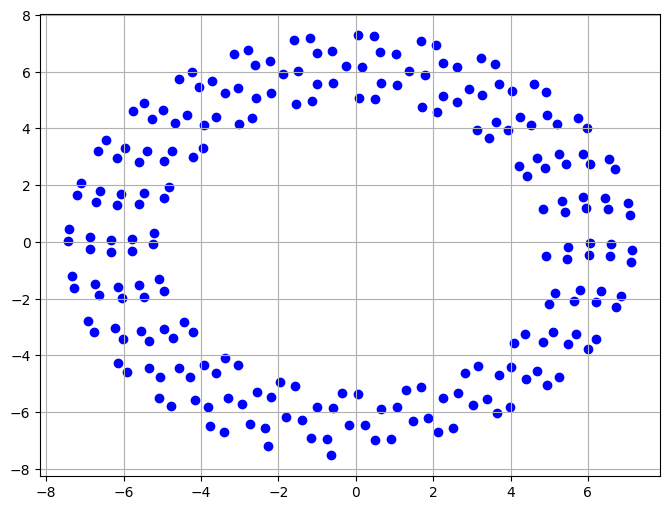

In [200]:

def eq_head(x,theta_temp,L1):
    return np.sqrt(r_length(theta_temp)**2 + r_length(x)**2 - 2 * r_length(theta_temp) * r_length(x) * np.cos(theta_temp - x)) - L1

def eq_others(x,theta_temp,L2):
    return np.sqrt(r_length(theta_temp)**2 + r_length(x)**2 - 2 * r_length(theta_temp) * r_length(x) * np.cos(theta_temp - x)) - L2



table1=[]
table_posxy=[]
v_pos=[]
for time in range(301):
# for time in range(442):
    solutions_row=[]
    solutionsXY_row=[]
    result_body_list=[]
    v_row=[]

    theta_temp = mei_miao_long_tou_de_theta[time] 
    
    solutions_row.append(theta_temp)
    solutionsXY_row.append(positionX(theta_temp))
    solutionsXY_row.append(positionY(theta_temp))
    v_row.append(1)

    result_head = root(eq_head, theta_temp, args=(theta_temp, L1)) 
    solutions_row.append(result_head.x[0])
    result_body_list.append(result_head.x[0])

    solutionsXY_row.append(positionX(result_head.x[0]))
    solutionsXY_row.append(positionY(result_head.x[0]))
    v_row.append(r_length(solutions_row[1])/r_length(solutions_row[0]))

    for i in range(222):
       
        InI=solutions_row[i]-(L2/r_length(solutions_row[i]))
        result_body = root(eq_others, InI-0.5, args=(solutions_row[i], L2))
        solutions_row.append(result_body.x[0])
        
        # if (time==15):
        #     # print(solutions_row[i]-result_body.x[0])
        #     print(result_body.x[0])
        # if (result_body.x[0])<=0: # or (result_body_list[i]<=0):
        #     result_body.x[0] = 0

        result_body_list.append(result_body.x[0])
     
        solutionsXY_row.append(positionX(result_body.x[0]))
        solutionsXY_row.append(positionY(result_body.x[0]))

        v_row.append(r_length(solutions_row[i+2])/r_length(solutions_row[0]))
    # print(v_row)
    # print(solutions_row)
    table1.append(solutions_row)
    table_posxy.append(solutionsXY_row)
    v_pos.append(v_row)
    # print(table1)
# x1=[]
# y1=[]

# sort = sorted(table1[300], reverse=True)

# for ttttt in sort:
#     positionX(ttttt)
#     positionY(ttttt)
#     x1.append(positionX(ttttt))
#     y1.append(positionY(ttttt))
# # 绘制散点图
# plt.figure(figsize=(8, 6))
# plt.scatter(x1, y1, color='blue', marker='o')

# plt.grid(True)
# plt.show()
# # plt.plot(x1,y1)


In [197]:
# table1_final = np.round(np.transpose(table_posxy),6)
# v_pos_final = np.round(np.transpose(v_pos),6)
# df1 = pd.DataFrame(table1_final)
# df2 = pd.DataFrame(v_pos_final)
# # 保存到Excel文件
# file1_path = r'D:\Mathematical_Modeling\MCM2024\CUMCM2024Problems\A题\Solution\result1位置.xlsx'
# df1.to_excel(file1_path, index=False, header=False)
# file2_path = r'D:\Mathematical_Modeling\MCM2024\CUMCM2024Problems\A题\Solution\result1速度.xlsx'
# df2.to_excel(file2_path, index=False, header=False)

Question2

C:\Users\GCX\AppData\Local\Temp\ipykernel_2472\4245565233.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r_length(theta_temp)**2 + r_length(x)**2 - 2 * r_length(theta_temp) * r_length(x) * np.cos(theta_temp - x)) - L1


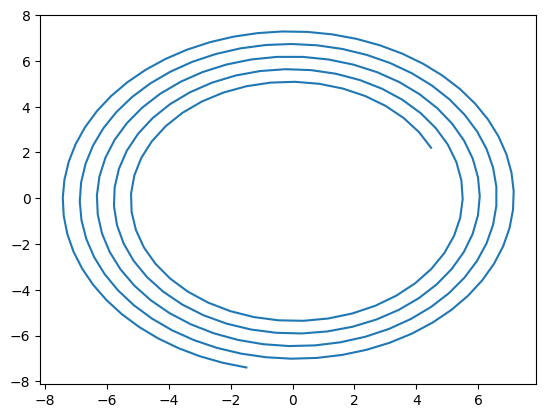

In [198]:

table1_fit=[]


for time in range(300):
    
    solutions_row=[]

    theta_temp = mei_miao_long_tou_de_theta[time] 
    
    solutions_row.append(theta_temp)


    result_head = root(eq_head, theta_temp, args=(theta_temp, L1)) 
    solutions_row.append(result_head.x[0])
    


    for i in range(222):
       
        InI=solutions_row[i]-(L2/r_length(solutions_row[i]))
        result_body = root(eq_others, InI-1, args=(solutions_row[i], L2))

        solutions_row.append(result_body.x[0])
    
    t = np.linspace(0, 223, 224)
    y = np.array(solutions_row)


    coeff=np.polyfit(t,y,2)

    # print(coeff)
    solutions_row_fit = coeff[0]*t**2 + coeff[1]*t + coeff[2]

    table1_fit.append(solutions_row_fit)

x=positionX(solutions_row_fit)
y=positionY(solutions_row_fit)
plt.plot(x,y)

In [199]:
# def line_equation(theta1,theta2):
#     x1=positionX(theta1)
#     y1=positionY(theta1)
#     x2=positionX(theta2)
#     y2=positionY(theta2)
#     k=(y2-y1)/(x2-x1)
#     b=y1-k*x1
#     return k,b

# def distance(theta,k,b):
#     x=positionX(theta)
#     y=positionY(theta)
    
#     A = -k
#     B = 1
#     C = -b

#     dis=abs(A * x + B * y + C) / np.sqrt(A**2 + B**2)

#     return dis

# break_bool=False
# final_time=0
# for time in range(412,422):
#     for loong in range(4,11):
#     # 龙头的把手是第0个把手，身子的把手是第1个把手
#     # 龙头是loong-1
        
#         theta1=table1_fit[time][loong]
#         theta2=table1_fit[time][loong+1]
#         theta=table1[time][0]
#         k,b=line_equation(theta1,theta2)
#         dis=distance(theta,k,b)
#         if dis<=(15+2.25):
#             break_bool=True
#             final_time=time
#             break
#     if break_bool:
#         break

# print(final_time)


